In [1]:
import matplotlib
%matplotlib inline
import numpy as np
from nilearn import datasets
from nilearn import plotting
import nibabel as nib
import pandas
from matplotlib import pyplot as plt
from neurolang import frontend as fe

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/amachlou/git/neurolang/neurolang/expression_pattern_matching.py:54: UserWarning: Warning in class FirstOrderLogicSolver overwrites {'existential_predicate', 'universal_predicate'} from base GenericSolver[typing.Any]
  warn(warn_message)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)


Example of how to translate the sulci file

`blender_obj_to_gifti -i 101309_L.obj -r 101309.L.pial.32k_fs_LR.surf.gii -o 101309.L.manual_drawings.func.gii`

`blender_obj_to_gifti -i 101309_L.obj -r 101309.L.pial.32k_fs_LR.surf.gii -o 101309.L.manual_drawings.func.gii -p ".*(sulcus|fissure|Fissure|primus).*"`

In [2]:
destrieux_dataset = datasets.fetch_atlas_destrieux_2009()
destrieux_map = nib.load(destrieux_dataset['maps'])
destrieux_dataset['labels']

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


rec.array([(  0, b'Background'), (  1, b'L G_and_S_frontomargin'),
           (  2, b'L G_and_S_occipital_inf'),
           (  3, b'L G_and_S_paracentral'),
           (  4, b'L G_and_S_subcentral'),
           (  5, b'L G_and_S_transv_frontopol'),
           (  6, b'L G_and_S_cingul-Ant'),
           (  7, b'L G_and_S_cingul-Mid-Ant'),
           (  8, b'L G_and_S_cingul-Mid-Post'),
           (  9, b'L G_cingul-Post-dorsal'),
           ( 10, b'L G_cingul-Post-ventral'), ( 11, b'L G_cuneus'),
           ( 12, b'L G_front_inf-Opercular'),
           ( 13, b'L G_front_inf-Orbital'),
           ( 14, b'L G_front_inf-Triangul'), ( 15, b'L G_front_middle'),
           ( 16, b'L G_front_sup'), ( 17, b'L G_Ins_lg_and_S_cent_ins'),
           ( 18, b'L G_insular_short'), ( 19, b'L G_occipital_middle'),
           ( 20, b'L G_occipital_sup'), ( 21, b'L G_oc-temp_lat-fusifor'),
           ( 22, b'L G_oc-temp_med-Lingual'),
           ( 23, b'L G_oc-temp_med-Parahip'), ( 24, b'L G_orbital'),
  

In [3]:
set_of_subject_data = [('101309', '101309.L.pial.32k_fs_LR.surf.gii','101309.LH.manual_drawings.func.gii'),
                      ('108121', '108121.L.pial.32k_fs_LR.surf.gii','108121.LH.manual_drawings.func.gii'),
                      ('102008', '102008.L.pial.32k_fs_LR.surf.gii','102008.LH.manual_drawings.func.gii'),
                      ('102311', '102311.L.pial.32k_fs_LR.surf.gii','102311.LH.manual_drawings.func.gii'),
                      ('107321', '107321.L.pial.32k_fs_LR.surf.gii','107321.LH.manual_drawings.func.gii'),
                      ('121315', '121315.L.pial.32k_fs_LR.surf.gii','121315.LH.manual_drawings.func.gii')]

In [4]:
manual_sulci = dict()
for subject_id, subject_surface, subject_tracing in set_of_subject_data:
    surface = nib.load(subject_surface)
    vertices = surface.darrays[0].data
    manual_sulci_gii = nib.load(subject_tracing)
    manual_sulci[subject_id]=dict()
    for darray in manual_sulci_gii.darrays:
        name = darray.meta.metadata['Name']
        name = name[:name.rfind('_')]
        Epoints = vertices[darray.data.nonzero()]
        manual_sulci[subject_id][name] = darray.data #points

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='101309.L.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='101309.LH.manual_drawings.func.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='108121.L.pial.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_ma

### LH probability map for all

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


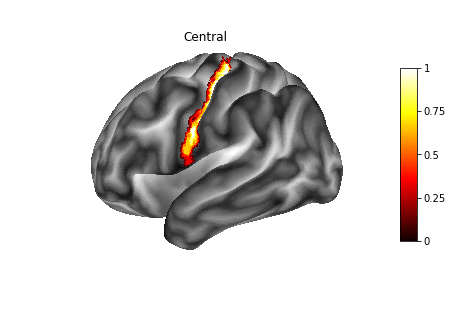

In [5]:
sulcus='Central'
sulcus_probability = 0
sulcus_probability_count = 0
female_ids = ['108121',
            '107321',
            '102311']

for y in female_ids:
    for sulcus_name in manual_sulci[y].keys():
        if sulcus in sulcus_name:
            sulcus_probability_count += 1
            sulcus_probability += manual_sulci[y][sulcus_name]
sulcus_probability /= sulcus_probability_count
plotting.surf_plotting.plot_surf_stat_map(
    '107321.L.inflated.32k_fs_LR.surf.gii', sulcus_probability, bg_map='107321.L.sulc.32k_fs_LR.shape.gii',
view='lateral', vmax=1, title=sulcus);

#### Subject genders:

Male:
- 101309
- 102008
- 121315

Female:
- 108121
- 107321
- 102311

### Gender variance in LH

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


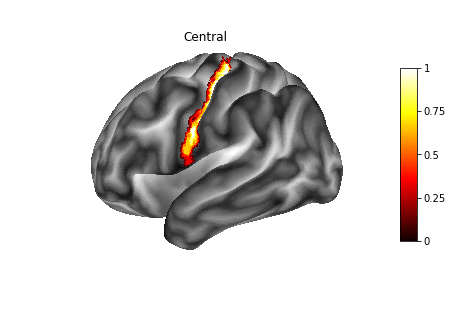

In [6]:
sulcus='Central'
f_sulcus_probability = 0
sulcus_probability_count = 0
female_ids = ['108121',
            '107321',
            '102311']

for y in female_ids:
    for sulcus_name in manual_sulci[y].keys():
        if sulcus in sulcus_name:
            sulcus_probability_count += 1
            f_sulcus_probability += manual_sulci[y][sulcus_name]
f_sulcus_probability /= sulcus_probability_count
plotting.surf_plotting.plot_surf_stat_map(
    '107321.L.inflated.32k_fs_LR.surf.gii', f_sulcus_probability, bg_map='107321.L.sulc.32k_fs_LR.shape.gii',
view='lateral', vmax=1, title=sulcus);

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


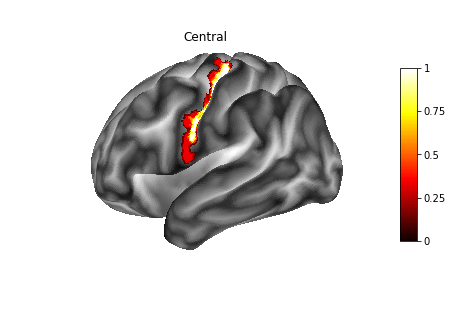

In [7]:
sulcus='Central'
m_sulcus_probability = 0
sulcus_probability_count = 0
male_ids = ['101309',
            '102008',
            '121315']

for x in male_ids:
    for sulcus_name in manual_sulci[x].keys():
        if sulcus in sulcus_name:
            sulcus_probability_count += 1
            m_sulcus_probability += manual_sulci[x][sulcus_name]
m_sulcus_probability /= sulcus_probability_count
plotting.surf_plotting.plot_surf_stat_map(
    '107321.L.inflated.32k_fs_LR.surf.gii', m_sulcus_probability, bg_map='107321.L.sulc.32k_fs_LR.shape.gii',
view='lateral', vmax=1, title=sulcus);

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


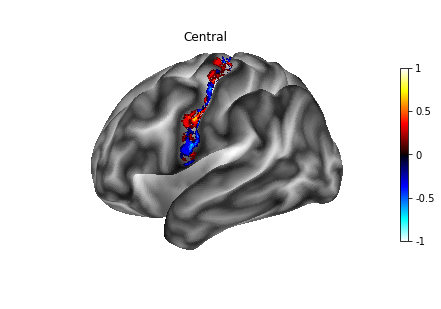

In [8]:
sulcus='Central'
m_sulcus_probability = 0
sulcus_probability_count = 0
male_ids = ['101309',
            '102008',
            '121315']

for x in male_ids:
    for sulcus_name in manual_sulci[x].keys():
        if sulcus in sulcus_name:
            sulcus_probability_count += 1
            m_sulcus_probability += manual_sulci[x][sulcus_name]
m_sulcus_probability /= sulcus_probability_count
plotting.surf_plotting.plot_surf_stat_map(
    '107321.L.inflated.32k_fs_LR.surf.gii', (m_sulcus_probability - f_sulcus_probability), bg_map='107321.L.sulc.32k_fs_LR.shape.gii',
view='lateral', vmax=1, title=sulcus);

(array([ 37., 166., 140.,   3.,   0.,   0.,   0.,   0., 127., 114.]),
 array([ 3437. ,  5062.2,  6687.4,  8312.6,  9937.8, 11563. , 13188.2,
        14813.4, 16438.6, 18063.8, 19689. ]),
 <a list of 10 Patch objects>)

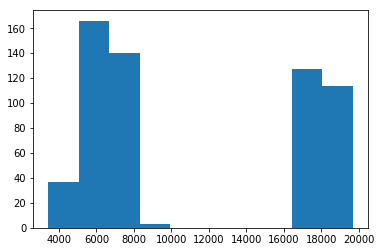

In [9]:
plt.hist((m_sulcus_probability - f_sulcus_probability).nonzero())

## Individual variance from mean

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


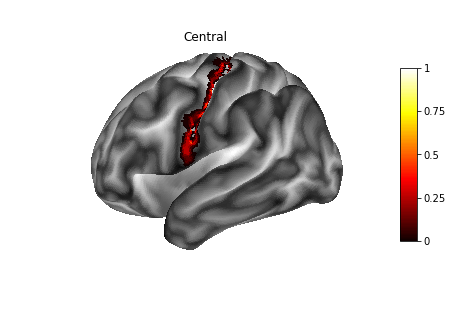

In [10]:
sulcus='Central'
sulcus_probability = 0
sulcus_probability_count = 0

for subject_id in manual_sulci:
    for sulcus_name in manual_sulci[subject_id].keys():
        if sulcus in sulcus_name:
            sulcus_probability_count += 1
            sulcus_probability += manual_sulci[subject_id][sulcus_name]
sulcus_probability /= sulcus_probability_count
plotting.surf_plotting.plot_surf_stat_map(
    '107321.L.inflated.32k_fs_LR.surf.gii', (sulcus_probability - manual_sulci['121315']['Central_sulcus'])**2, bg_map='107321.L.sulc.32k_fs_LR.shape.gii',
view='lateral', vmax=1, title=sulcus);

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


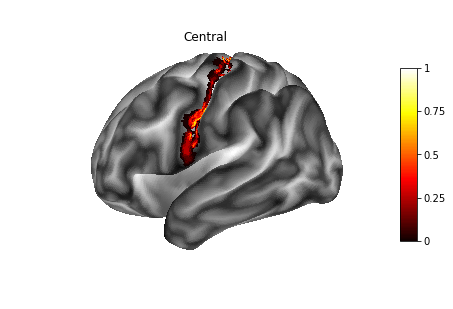

In [11]:
sulcus='Central'
sulcus_probability = 0
sulcus_probability_count = 0

for subject_id in manual_sulci:
    for sulcus_name in manual_sulci[subject_id].keys():
        if sulcus in sulcus_name:
            sulcus_probability_count += 1
            sulcus_probability += manual_sulci[subject_id][sulcus_name]
sulcus_probability /= sulcus_probability_count
plotting.surf_plotting.plot_surf_stat_map(
    '107321.L.inflated.32k_fs_LR.surf.gii', (sulcus_probability - manual_sulci['102311']['Central_sulcus'])**2, bg_map='107321.L.sulc.32k_fs_LR.shape.gii',
view='lateral', vmax=1, title=sulcus);

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


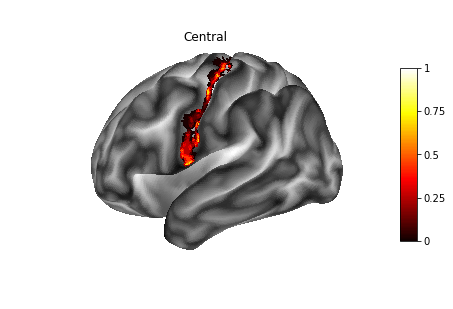

In [12]:
sulcus='Central'
sulcus_probability = 0
sulcus_probability_count = 0

for subject_id in manual_sulci:
    for sulcus_name in manual_sulci[subject_id].keys():
        if sulcus in sulcus_name:
            sulcus_probability_count += 1
            sulcus_probability += manual_sulci[subject_id][sulcus_name]
sulcus_probability /= sulcus_probability_count
plotting.surf_plotting.plot_surf_stat_map(
    '107321.L.inflated.32k_fs_LR.surf.gii', (sulcus_probability - manual_sulci['107321']['Central_sulcus'])**2, bg_map='107321.L.sulc.32k_fs_LR.shape.gii',
view='lateral', vmax=1, title=sulcus);

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


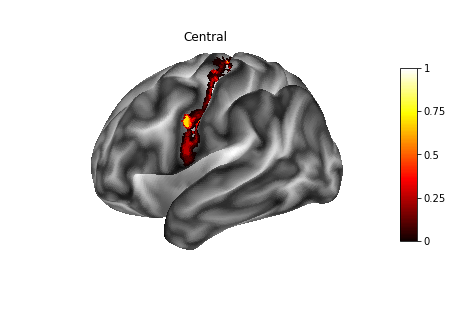

In [13]:
sulcus='Central'
sulcus_probability = 0
sulcus_probability_count = 0

for subject_id in manual_sulci:
    for sulcus_name in manual_sulci[subject_id].keys():
        if sulcus in sulcus_name:
            sulcus_probability_count += 1
            sulcus_probability += manual_sulci[subject_id][sulcus_name]
sulcus_probability /= sulcus_probability_count
plotting.surf_plotting.plot_surf_stat_map(
    '107321.L.inflated.32k_fs_LR.surf.gii', (sulcus_probability - manual_sulci['102008']['Central_sulcus'])**2, bg_map='107321.L.sulc.32k_fs_LR.shape.gii',
view='lateral', vmax=1, title=sulcus);

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


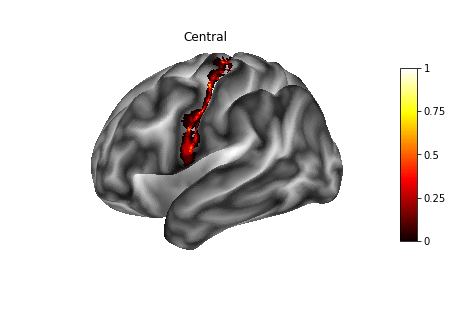

In [14]:
sulcus='Central'
sulcus_probability = 0
sulcus_probability_count = 0

for subject_id in manual_sulci:
    for sulcus_name in manual_sulci[subject_id].keys():
        if sulcus in sulcus_name:
            sulcus_probability_count += 1
            sulcus_probability += manual_sulci[subject_id][sulcus_name]
sulcus_probability /= sulcus_probability_count
plotting.surf_plotting.plot_surf_stat_map(
    '107321.L.inflated.32k_fs_LR.surf.gii', (sulcus_probability - manual_sulci['108121']['Central_sulcus'])**2, bg_map='107321.L.sulc.32k_fs_LR.shape.gii',
view='lateral', vmax=1, title=sulcus);

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


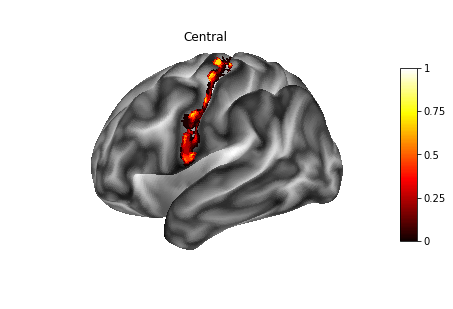

In [15]:
sulcus='Central'
sulcus_probability = 0
sulcus_probability_count = 0

for subject_id in manual_sulci:
    for sulcus_name in manual_sulci[subject_id].keys():
        if sulcus in sulcus_name:
            sulcus_probability_count += 1
            sulcus_probability += manual_sulci[subject_id][sulcus_name]
sulcus_probability /= sulcus_probability_count
plotting.surf_plotting.plot_surf_stat_map(
    '107321.L.inflated.32k_fs_LR.surf.gii', (sulcus_probability - manual_sulci['101309']['Central_sulcus'])**2, bg_map='107321.L.sulc.32k_fs_LR.shape.gii',
view='lateral', vmax=1, title=sulcus);

### Variance of all subjects in LH

In [20]:
to_calc_variance={}
for subject_id in manual_sulci.keys():
    paracs_var = ((sulcus_probability - manual_sulci[subject_id]['Central_sulcus'])**2)
    to_calc_variance[subject_id]=paracs_var
print(to_calc_variance)

{'101309': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), '108121': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), '102008': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), '102311': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), '107321': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), '121315': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)}


In [21]:
var_all = ((to_calc_variance['101309']) + (to_calc_variance['108121']) + (to_calc_variance['102008']) + (to_calc_variance['107321']) + (to_calc_variance['102311']) + (to_calc_variance['121315'])) / 6

/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.inflated.32k_fs_LR.surf.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))
/home/amachlou/miniconda3/envs/antonia/lib/python3.6/site-packages/nibabel/gifti/gifti.py:760: ResourceWarning: unclosed file <_io.BufferedReader name='107321.L.sulc.32k_fs_LR.shape.gii'>
  parser.parse(fptr=file_map['image'].get_prepare_fileobj('rb'))


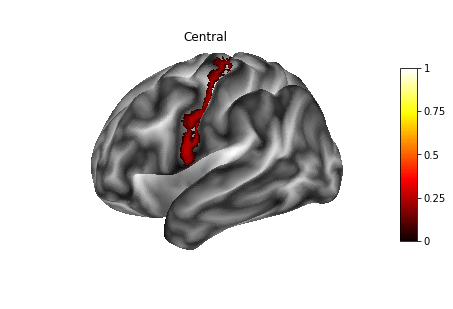

In [22]:
sulcus='Central'
sulcus_probability = 0
sulcus_probability_count = 0

for subject_id in manual_sulci:
    for sulcus_name in manual_sulci[subject_id].keys():
        if sulcus in sulcus_name:
            sulcus_probability_count += 1
            sulcus_probability += manual_sulci[subject_id][sulcus_name]
sulcus_probability /= sulcus_probability_count
plotting.surf_plotting.plot_surf_stat_map(
    '107321.L.inflated.32k_fs_LR.surf.gii', var_all, bg_map='107321.L.sulc.32k_fs_LR.shape.gii',
view='lateral', vmax=1, title=sulcus);

(array([31724.,     0.,     0.,     0.,     0.,   387.,     0.,     0.,
          264.,   117.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 ], dtype=float32),
 <a list of 10 Patch objects>)

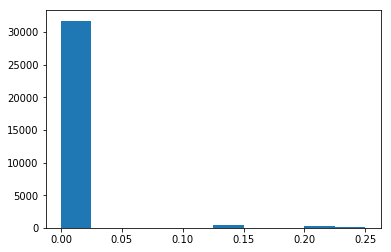

In [23]:
plt.hist(var_all)